# <img src="https://img.icons8.com/emoji/96/000000/strawberry-emoji.png"/> <div style="text-align: center"> Strawberry Problem</div> 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import click

In [2]:
costprice=float(input("Enter cost price: "))
sellprice=float(input("Enter selling price: "))
salvageprice=float(input("Enter salvage price: "))

Enter cost price: 60
Enter selling price: 90
Enter salvage price: 30


In [3]:
order_quantity = [x for x in range(12,16)]
table=pd.read_excel(r'IEOR Strawberry Table.xlsx', sheet_name='Sheet1')
table

,Demand,No. of Days
0,12,12
1,13,24
2,14,36
3,15,48


In [4]:
table["Probability"]=None
for  x in range (0,len(table)) :
    table.loc[x,"Probability"]=table.iloc[x,1]/table.iloc[:,1].sum()
table

,Demand,No. of Days,Probability
0,12,12,0.1
1,13,24,0.2
2,14,36,0.3
3,15,48,0.4


In [5]:
for y in order_quantity:
    table[y]=None
    for  x in range (0,len(table)) :
        if y>table.iloc[x,0]:
            table.loc[x,y]=table.iloc[x,0]*sellprice-y*costprice+(y-table.iloc[x,0])*salvageprice
        else:
            table.loc[x,y]=y*(sellprice-costprice)
table

,Demand,No. of Days,Probability,12,13,14,15
0,12,12,0.1,360,330,300,270
1,13,24,0.2,360,390,360,330
2,14,36,0.3,360,390,420,390
3,15,48,0.4,360,390,420,450


In [6]:
Expected_payoffs=pd.DataFrame(data=None,index=order_quantity,columns=["Expected Payoff"],dtype=float)
for z in order_quantity:
    payoff=0
    for  x in range (0,len(table)) :
        payoff+=table.loc[x,"Probability"]*table.loc[x,z]
    Expected_payoffs.loc[z,"Expected Payoff"]=payoff
Expected_payoffs
Expected_payoffs.style.highlight_max(color = 'lightgreen')

,Expected Payoff
12,360.000000
13,384.000000
14,396.000000
15,390.000000


In [7]:
print(table)
print('\n')
print(Expected_payoffs)
column = Expected_payoffs["Expected Payoff"]
Max_Expected_Profit=column.max(axis = 0) 
print('\nThe maximum expected profit = ',Max_Expected_Profit)
Optimum_Boxes = column.idxmax()
print('\nThe optimum number of boxes for maximum profit = ',Optimum_Boxes)

   Demand  No. of Days Probability   12   13   14   15
0      12           12         0.1  360  330  300  270
1      13           24         0.2  360  390  360  330
2      14           36         0.3  360  390  420  390
3      15           48         0.4  360  390  420  450


    Expected Payoff
12            360.0
13            384.0
14            396.0
15            390.0

The maximum expected profit =  396.0

The optimum number of boxes for maximum profit =  14


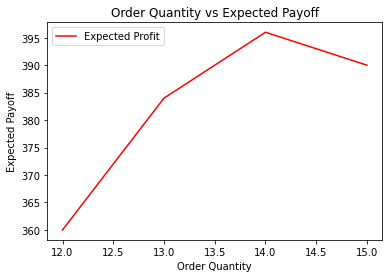

In [8]:
x=order_quantity
y=Expected_payoffs
plt.plot(x,y,label = "Expected Profit", color='red')
plt.xlabel('Order Quantity')  
plt.ylabel('Expected Payoff')
plt.title('Order Quantity vs Expected Payoff') 
plt.legend() 
plt.show() 